In [1]:
import pandas as pd
pups_df = pd.read_csv('pupSlice.csv',header=None)
pups_df.head()

,0
0,0.705882
1,0.705882
2,0.729412
3,0.745098
4,0.749020


In [2]:
from sklearn.datasets import make_regression
import numpy as np

dataset_switch = 'pups'

# making our dataset with a few different switches or options
if dataset_switch == 'linear':
    X,y = make_regression(
        n_samples=100,
        n_features=1,
        random_state = 11,
        noise = 10
    )
    X = X[:,0]
elif dataset_switch == 'exponential':
    X,_ = make_regression(
        n_samples=100,
        n_features=1,
        random_state = 11,
        noise = 10
    )
    X = X[:,0]
    from numpy.random import default_rng
    rng = default_rng()
    vals = rng.standard_normal(100)/2
    y = np.power(3,X) + vals
elif dataset_switch == 'even_spacing':
    X = np.linspace(-2.0, 3.0, num=100)
    y = 40*X
elif dataset_switch == 'pups':
    X = np.arange(1,3024+1)
    y = pups_df[0].values

import pandas as pd

df = pd.DataFrame({
    'x':X,
    'y':y
})

df = df.sort_values(by=['x'])



x_min = min(df['x'])
x_max = max(df['x'])
from math import pi
df['x_trans'] = ( df['x'] - x_min)/(x_max-x_min)* pi

from math import cos
from math import sqrt

num_rows = len(df.index)


1
The condition number under the 2-norm is 1.0
The error is11.4
2
The condition number under the 2-norm is 1.0
The error is11.4
4
The condition number under the 2-norm is 1.0
The error is10.4
9
The condition number under the 2-norm is 1.0
The error is7.9
20
The condition number under the 2-norm is 1.0
The error is5.8
41
The condition number under the 2-norm is 1.0
The error is3.0
87
The condition number under the 2-norm is 1.0
The error is1.9
183
The condition number under the 2-norm is 1.0
The error is1.1
386
The condition number under the 2-norm is 1.1
The error is0.5
813
The condition number under the 2-norm is 1.1
The error is0.1


Text(0.5, 1.0, 'Comparison of Different Numbers of Cosines')

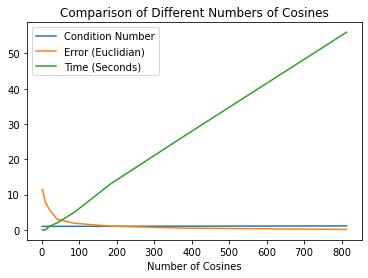

In [3]:
import datetime
log_xs = np.around(np.logspace(0,2.91,10))
from numpy.linalg import cond

conds = []
errors = []
times = []

for num_weights in log_xs:
    
    t1 = datetime.datetime.now()
    
    # num_weights = 850
    num_weights = int(num_weights)

    df['cos0'] = df['x_trans'].apply(lambda x: cos(0*x) / sqrt(num_rows))

    for i in range(1,num_weights):
        df[f'cos{i}'] = df['x_trans'].apply(lambda x: sqrt(2)*cos(i*x) / sqrt(num_rows))

    A = df[[f"cos{x}" for x in range(0,num_weights)]].values
    b = df['y'].values

    w = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)

    def f(row):
        return sum([row[f'cos{x}'] * w[x] for x in range(0,num_weights)])

    df['pred'] = df.apply(f, axis=1)
    
    df['error'] = (df['pred'] - df['y']) ** 2
    
    error = sum(df['error']) ** (1/2)

    c_num = cond(A)
    
    t2 = datetime.datetime.now()

    print(num_weights)
    print(f"The condition number under the 2-norm is {round(c_num,1)}")
    print(f"The error is{round(error,1)}")
    conds.append(c_num)
    errors.append(error)
    times.append((t2-t1).seconds)

import matplotlib.pyplot as plt
plt.plot(log_xs,conds,label='Condition Number')
plt.plot(log_xs,errors,label='Error (Euclidian)')
plt.plot(log_xs,times,label='Time (Seconds)')
plt.legend()
plt.xlabel('Number of Cosines')
plt.title('Comparison of Different Numbers of Cosines')

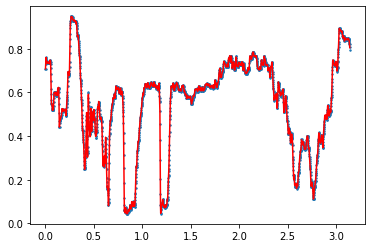

In [4]:
import matplotlib.pyplot as plt


plt.plot(df['x_trans'],df['pred'], c= "r")
plt.scatter(df['x_trans'],df['y'],s=2)
plt.savefig(f'{dataset_switch}.png')

plt.show()

Text(0.5, 1.0, 'Weights of cosines in the 813 case')

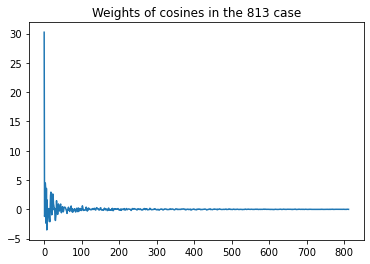

In [5]:
plt.plot(w)
plt.title('Weights of cosines in the 813 case')

(-2.0, 2.0)

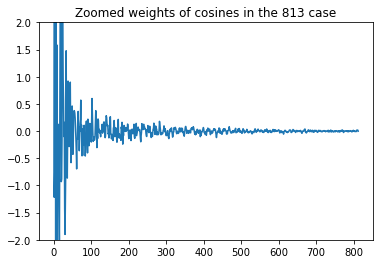

In [6]:
plt.plot(w)
plt.title('Zoomed weights of cosines in the 813 case')
plt.ylim(-2,2)

3
8.739428126597181


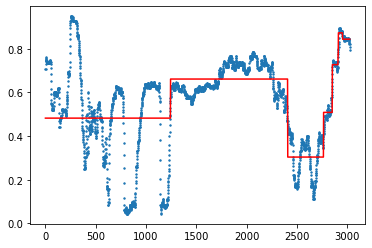

In [7]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)

for max_depth in [3]: #np.around(np.logspace(0,1.4,10)):

    regr_1 = DecisionTreeRegressor(max_depth=max_depth)
    
    regr_1.fit(df['x'].values.reshape(-1, 1), df['y'])
    
    df['dec_tree'] = regr_1.predict(df['x'].values.reshape(-1, 1))

    print(max_depth)
    print(sum((df['dec_tree'] - df['y']) ** 2) ** (1/2))

plt.plot(df['x'],df['dec_tree'], c= "r")
plt.scatter(df['x'],df['y'],s=2)
plt.show()

[Text(167.4, 190.26, 'X[0] <= 2849.5\nmse = 0.043\nsamples = 3024\nvalue = 0.55'),
 Text(83.7, 135.9, 'X[0] <= 2406.5\nmse = 0.041\nsamples = 2849\nvalue = 0.534'),
 Text(41.85, 81.53999999999999, 'X[0] <= 1242.5\nmse = 0.038\nsamples = 2406\nvalue = 0.569'),
 Text(20.925, 27.180000000000007, 'mse = 0.055\nsamples = 1242\nvalue = 0.482'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.004\nsamples = 1164\nvalue = 0.661'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2762.5\nmse = 0.014\nsamples = 443\nvalue = 0.344'),
 Text(104.625, 27.180000000000007, 'mse = 0.009\nsamples = 356\nvalue = 0.304'),
 Text(146.475, 27.180000000000007, 'mse = 0.002\nsamples = 87\nvalue = 0.508'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2909.5\nmse = 0.004\nsamples = 175\nvalue = 0.812'),
 Text(209.25, 81.53999999999999, 'X[0] <= 2906.5\nmse = 0.0\nsamples = 60\nvalue = 0.729'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.0\nsamples = 57\nvalue = 0.727'),
 Text(230.175, 27.1800

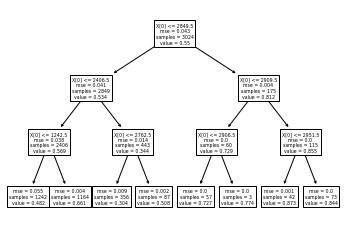

In [8]:
from sklearn import tree
tree.plot_tree(regr_1)

In [ ]:
if False:
    num_weights = 6

    df['cos0'] = df['x_trans'].apply(lambda x: cos(0*x) / sqrt(num_rows))

    for i in range(1,num_weights):
        df[f'cos{i}'] = df['x_trans'].apply(lambda x: sqrt(2)*cos(i*x) / sqrt(num_rows))

    A = df[[f"cos{x}" for x in range(0,num_weights)]].values
    b = df['y'].values

    w = np.linalg.solve(np.transpose(A) @ A, np.transpose(A) @ b)

    def f(row):
        return sum([row[f'cos{x}'] * w[x] for x in range(0,num_weights)])

    df['pred'] = df.apply(f, axis=1)

    from numpy.linalg import cond

    print(f"The condition number under the 2-norm is {round(cond(A),1)}")

    import matplotlib.pyplot as plt



    plt.plot(df['x_trans'],df['pred'], c= "r")
    plt.scatter(df['x_trans'],df['y'])
    plt.savefig(f'{dataset_switch}.png')

    plt.show()